# 微分

## データのプロットと傾き

### データのプロット

In [1]:
# NumPy を名前np でインポート
import numpy as np
# Matplotlib のplyplot を名前plt でインポート
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 日本の人口データのcsv ファイルを読み込む
data_jp_population = np.loadtxt('../data/jp_population.csv',
                                delimiter=',')


In [3]:
# 1 列目が人口の集計年、2 列目が人口
year = data_jp_population[:, 0]
jp_pop = data_jp_population[:, 1] / 1000 # 百万人単位に変換

# データの始め5 点を出力
print('Year: {0}'.format(year[:5]))
print('Population: {0}'.format(jp_pop[:5]))

Year: [1910. 1915. 1920. 1925. 1930.]
Population: [49.184 52.752 55.963 59.737 64.45 ]


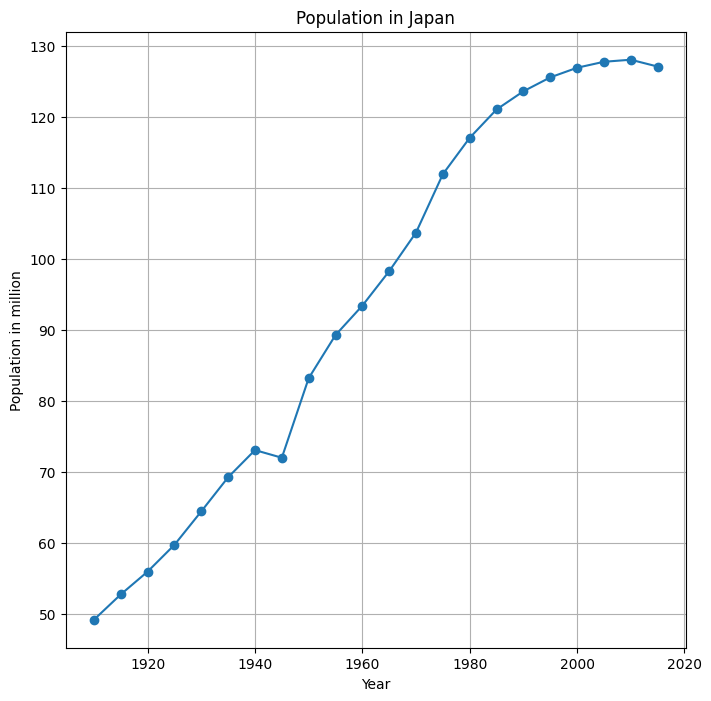

In [4]:
# キャンバスの作成
# figsize で(横, 縦) の大きさを指定
fig = plt.figure(figsize=(8, 8))
# キャンバス上にグラフを描画するための領域を作る
ax = fig.add_subplot(111)

# 横軸を年、縦軸を人口でプロットする
ax.plot(year, jp_pop, marker='o')
# グラフにタイトルをつける
ax.set_title('Population in Japan')
# X 軸にラベルをつける
ax.set_xlabel('Year')
# Y 軸にラベルをつける
ax.set_ylabel('Population in million')
# グリッドを表示する
ax.grid()
#グラフの表示
plt.show()

### 人口の変化量

In [5]:
# 2015 年の人口の変化量, 単位は百万人
jp_pop[21] - jp_pop[20]

-0.9619999999999891

In [6]:
# diff_jp_pop[i] = jp_pop[i+1] - jp_pop[i]
diff_jp_pop = np.diff(jp_pop, n=1)

# 2000 年、2010 年、2015 年の人口変化を表示
print('Population: {0}'.format(diff_jp_pop[-3:]))

Population: [ 0.842  0.289 -0.962]


### 人口の変化率

In [7]:
# データの年間隔を計算
diff_year = np.diff(year, n=1)
print('Year: {0}'.format(diff_year[:5]))

Year: [5. 5. 5. 5. 5.]


In [8]:
# 人口の変化率を、人口の変化量/ 時間変化量から計算
ave_diff_rate_jp_pop = diff_jp_pop / diff_year

print('Population rate: {0}'.format(ave_diff_rate_jp_pop[:5]))

Population rate: [0.7136 0.6422 0.7548 0.9426 0.9608]


### 人口変化率のプロット

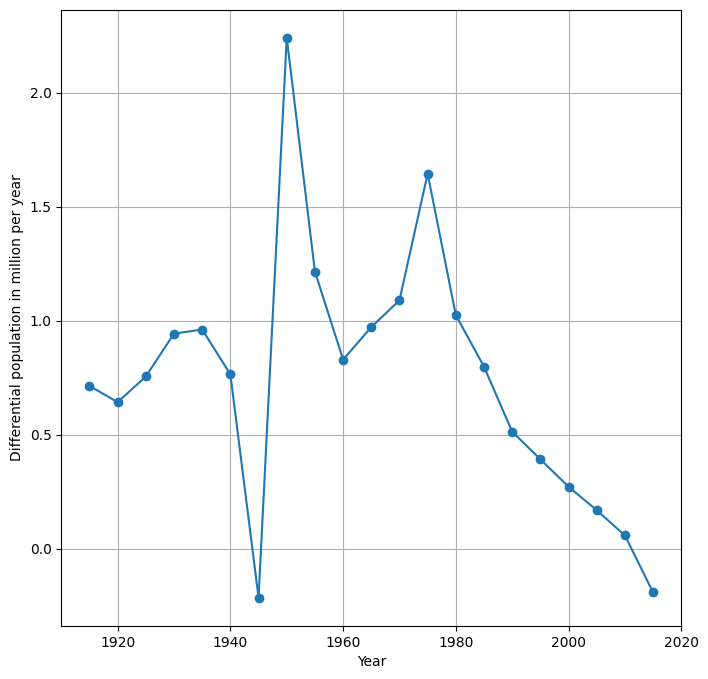

In [9]:
# 人口の変化率のプロットの作成
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# 人口の変化率をプロット
ax.plot(year[1:], ave_diff_rate_jp_pop, marker='o')
# 横軸: 年(Year)
ax.set_xlabel('Year')
# 縦軸: 人口変化(Differential population)
ax.set_ylabel('Differential population in million per year')
# グリッドを表示する
ax.grid()

plt.show()

## 平均変化率

In [10]:
# 平均変化率の計算
from sympy import symbols, init_printing

init_printing(use_latex="mathjax")

# 変数と関数
x = symbols('x')
f = x**2

# (1, f(1)) と(2, f(2)) の平均値変化率
(f.subs(x, 2) - f.subs(x, 1)) / (2 - 1)

3

In [11]:
# 平均変化率を出力する関数、f はsymbol、a,b は数値またはsymbol
def ave_rate(f, a, b):
    return (f.subs(x, b) - f.subs(x, a))/(b - a)

In [12]:
# (1, f(1)) と(2, f(2)) の平均変化率を計算
ave_rate(f, 1, 2)

3

### 直線の方程式

In [13]:
# 2点(1, f(1))と(2, f(2))を通る直線の方程式
ave_rate(f, 1, 2)*(x - 2) + f.subs(x, 2)

3⋅x - 2

In [14]:
#関数f(x)上の2点(a, f(a))と(b, f(b))を通る直線の式を出力する関数
def line_bw_2pts(f, a, b):
    return ave_rate(f, a, b) * (x - a) + f.subs(x, a)

In [15]:
line_bw_2pts(f, 1, 2)

3⋅x - 2

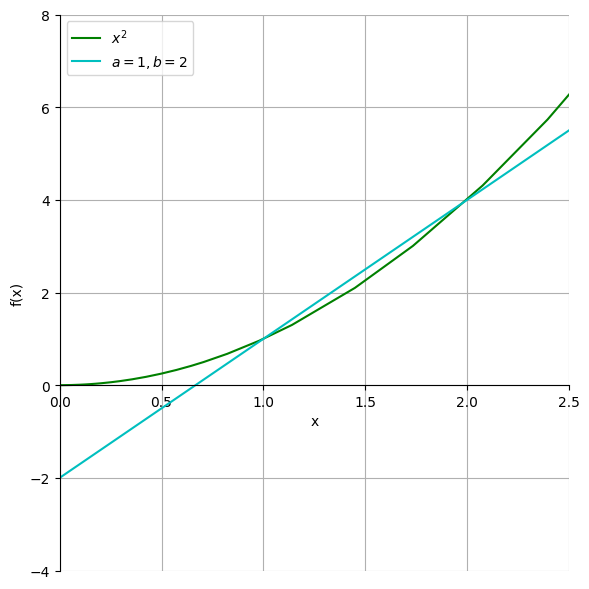

In [16]:
# 2 点を通る直線のプロットを作成
from sympy.plotting import plot
# プロットの設定にmatplotlib からrcdefaults をインポート
from matplotlib import rcdefaults
import matplotlib.pyplot as plt

p = plot(f,line_bw_2pts(f, 1, 2),
        show=False, legend=True)

# 表示範囲の設定
p.xlim = [0, 2.5]
p.ylim = [-4, 8]

# プロットの色の設定
p[0].line_color = 'g'
p[1].line_color = 'c'

# グラフ凡例の設定。数式表示のために'$' で囲む
p[0].label = '$x^2$'
p[1].label = '$a=1, b=2$'

# プロットの設定
rcdefaults()
plt.rcParams['figure.figsize'] = 6, 6 # プロットサイズ
plt.rcParams['legend.loc'] = 'upper left' # 凡例の表示位置
plt.rcParams['axes.grid'] = True # グリッドの表示

# プロットの表示
p.show()

## 局所的な2 点を通る直線

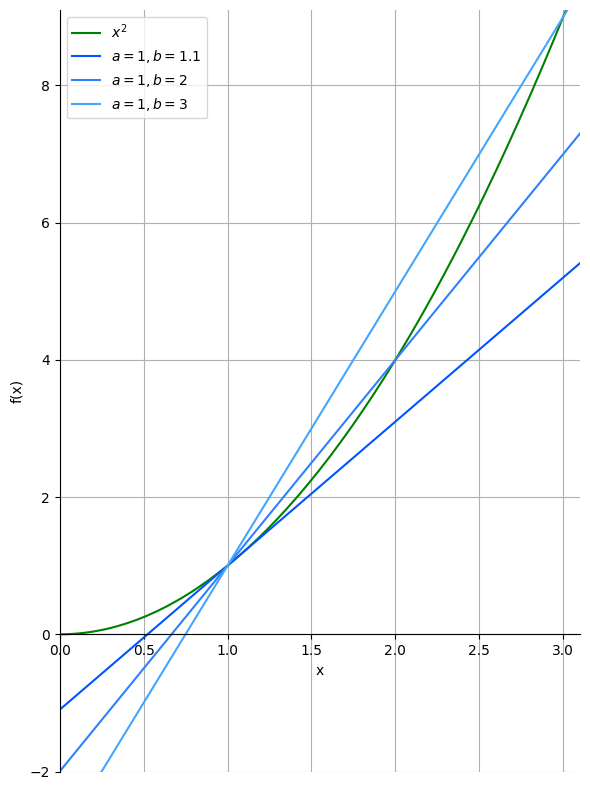

In [17]:
# 局所的な2 点を通る直線のプロットの作成
p = plot((f, (x, 0, 4)),
        (line_bw_2pts(f, 1, 1.1), (x, 0, 4)),
        (line_bw_2pts(f, 1, 2), (x, 0, 4)),
        (line_bw_2pts(f, 1, 3), (x, 0, 4)),
        show=False, legend=True)

# 表示範囲の設定
p.xlim = [0, 3.1]
p.ylim = [-2, 9.1]

# プロットの色の設定
p[0].line_color = 'g'
p[1].line_color = '#0055FF' # プロットの色を#rrggbb カラーコードで指定
p[2].line_color = '#2F80FF'
p[3].line_color = '#44A5FF'

# 凡例の設定
p[0].label = '$x^2$'
p[1].label = '$a=1, b=1.1$'
p[2].label = '$a=1, b=2$'
p[3].label = '$a=1, b=3$'

# プロットの設定
rcdefaults()
plt.rcParams['figure.figsize'] = 6, 8
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['axes.grid'] = True

# プロットの表示
p.show()

## 微分する - 導関数

## 導関数の計算

In [18]:
#　定義式から微分を計算
from sympy import limit
h = symbols('h')

# 極限値の計算
limit((f.subs(x, x+h) - f) / h, h, 0)

2⋅x

In [19]:
# sympy のdiff関数を使用して微分
from sympy import diff
diff(f, x)

2⋅x

## 高階微分

In [20]:
# f をx について2 回微分する
diff(f, x, 2)

2

## 積・商の微分

微分の基本公式をSymPyで計算する。

In [21]:
from sympy import Function
x = symbols('x', real=True)

# 関数Function としてf とg を定義する
f = Function('f')
g = Function('g')

# 積の微分
diff(f(x) * g(x), x)

     d               d       
f(x)⋅──(g(x)) + g(x)⋅──(f(x))
     dx              dx      

In [22]:
#商の微分
diff(f(x) / g(x))

       d          d       
  f(x)⋅──(g(x))   ──(f(x))
       dx         dx      
- ───────────── + ────────
       2            g(x)  
      g (x)               

## 関数の微分

In [23]:
# 凡例の数式表示のためにLaTeX をインポート
from sympy import latex

# プロット設定の初期化
rcdefaults()

# 関数f の微分を計算しプロットを作成する関数
def diff_and_mk_graph(f, x_range=[-4, 4], y_range=[0, 0]):
    # f と微分diff(f) のプロットを作成
    p = plot(f, diff(f), (x, x_range[0], x_range[1]),
    show=False, legend=True)
    if(y_range != [0, 0]):
        p.ylim = [y_range[0], y_range[1]]
    # プロットの色の設定
    p[0].line_color = 'b'
    p[1].line_color = 'r'
    # 凡例の設定
    p[0].label = f'Original: ${latex(f)}$'
    p[1].label = f'Differential: ${latex(diff(f))}$'
    # プロットの表示
    p.show()

### 二次関数

$$ f(x) = x^2 $$

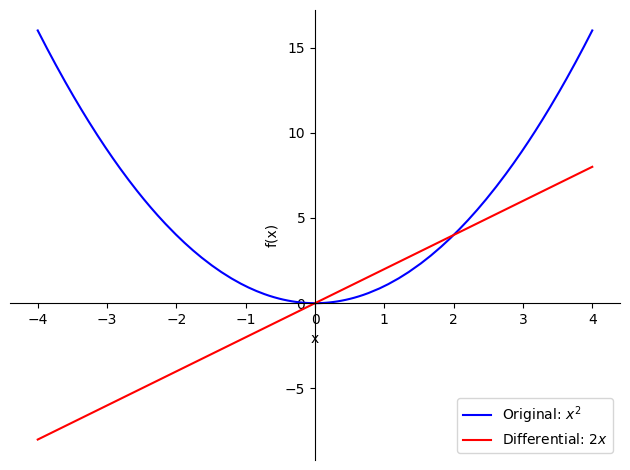

In [24]:
diff_and_mk_graph(x**2)

### n次関数

$$ f(x) = x^n $$

In [25]:
n = symbols('n')
diff(x**n, x)

   n
n⋅x 
────
 x  

In [26]:
from sympy import powsimp

powsimp(diff(x**n, x)) #x**n/xの指数計算をする

   n - 1
n⋅x     

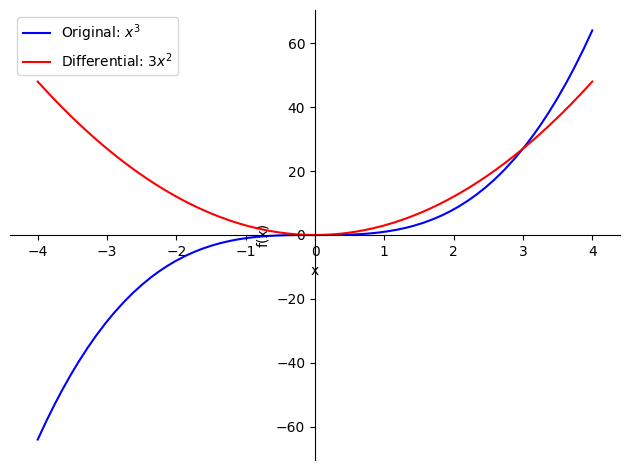

In [27]:
diff_and_mk_graph(x**3)

### 三角関数

$$ f(x) = \sin{x} $$

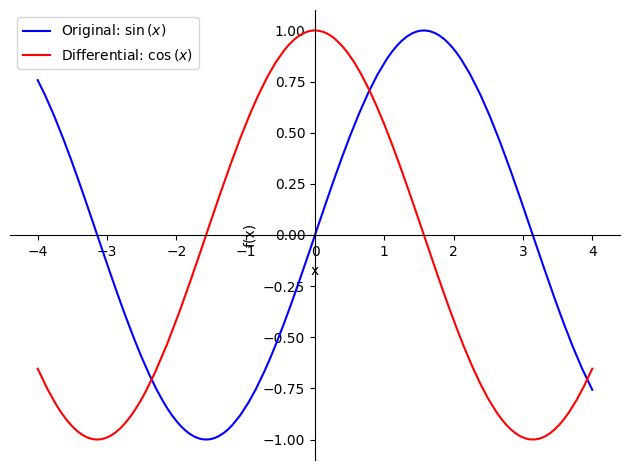

In [28]:
from sympy import sin, cos, tan, pi
diff_and_mk_graph(sin(x))

$$f(x) = \cos{x}$$

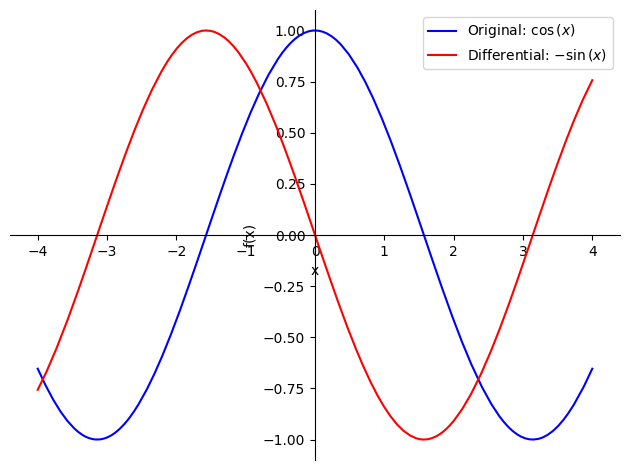

In [29]:
diff_and_mk_graph(cos(x))

$$f(x) = \tan{x}$$

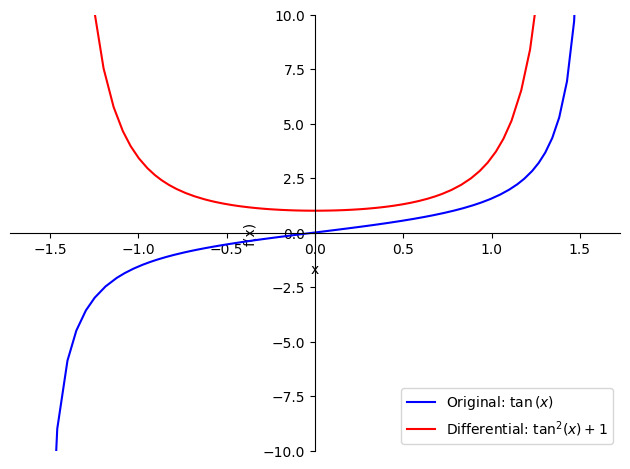

In [30]:
diff_and_mk_graph(tan(x), [-pi/2, pi/2], [-10, 10])

## 対数関数

$$ f(x) = \log{x} $$

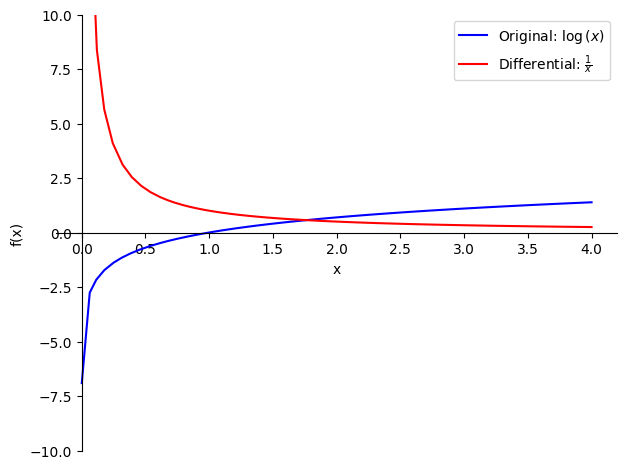

In [31]:
from sympy import log
diff_and_mk_graph(log(x), [0.001, 4.000], [-10, 10])

## 指数関数

$$ f(x) = e^x $$

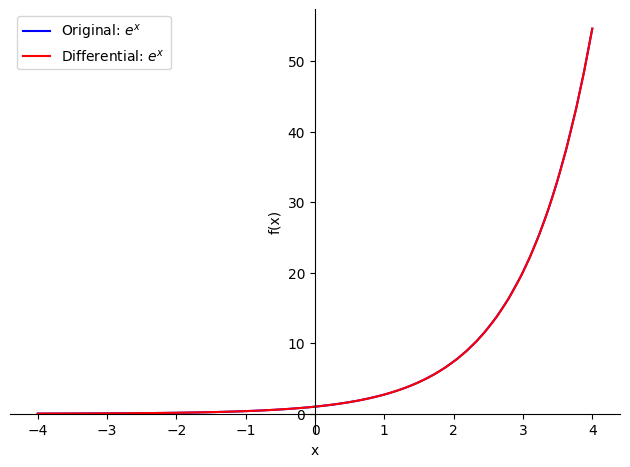

In [32]:
from sympy import exp
diff_and_mk_graph(exp(x))

### シグモイド関数

$$f(x) = \frac{1}{1 + e^{-x}} $$

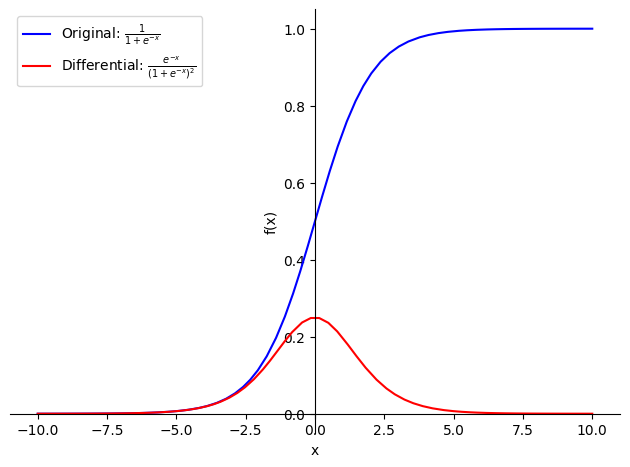

In [33]:
diff_and_mk_graph(1/(1 + exp(-x)), [-10, 10])